In [85]:
import numpy as np
from numpy import *
import scipy.io
from scipy import special
import matplotlib
import matplotlib.pyplot as plt
import struct


from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


%matplotlib inline  

In [86]:
#file = open('/fastdata/cs1mkg/smaug/spic5b2_2_tube1/zerospic1__761000.out','rb')
file = open('/fastdata/cs1mkg/smaug/spic_5b2_2_bv50G/zerospic1__177000.out','rb')
#file = open('/fastdata/cs1mkg/smaug/spic_5b2_2_bv20G/zerospic1__469000.out','rb')




In [97]:

R=8.3e+003
mu=1.257E-6
mu_gas=0.6
gamma=1.66667





In [ ]:
#;****************** Pressure background begin ********************
#TP=saeb
#TP=TP-(sabx_t^2.0+saby_t^2.0+sabz_t^2.0)/2.0
#TP=(gamma-1.d0)*TP
#;****************** Pressure background end ********************
#T=mu_gas*TP/R/sarho_t

In [87]:
file.seek(0,2)
eof = file.tell()
file.seek(0,0)

name = file.read(79)

nit = fromfile(file,dtype=int32,count=1)

t = fromfile(file,dtype=float64,count=1)
ndim=fromfile(file,dtype=int32,count=1)
neqpar=fromfile(file,dtype=int32,count=1)
nw=fromfile(file,dtype=int32,count=1)

ndata = fromfile(file,dtype=int32,count=ndim)[:ndim]

varbuf = fromfile(file,dtype=float,count=7)[:7]

#if ndim=2
varnames = file.read(79)

#if ndim=3
 
 
 
 
 
 #typedef enum vars {rho, mom1, mom2, mom3, energy, b1, b2, b3,energyb,rhob,b1b,b2b,b3b} CEV;

if ndim==3:
    alldat=fromfile(file,dtype=float,count=(nw+ndim)*ndata[0]*ndata[1]*ndata[2])[:(nw+ndim)*ndata[0]*ndata[1]*ndata[2]]
    #if size(alldat)<(nw+ndim)*ndata[0]*ndata[1]*ndata[2]:
    #    alldat=resize(alldat,(nw+ndim)*ndata[0]*ndata[1]*ndata[2])
    alldat=np.reshape(alldat,(nw+ndim,ndata[0],ndata[1],ndata[2],),'C')  # should be 'C' 'F' or 'A' order

file.close()


/usr/local/packages/apps/conda/envs/anaconda2-4.2.0/lib/python2.7/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/usr/local/packages/apps/conda/envs/anaconda2-4.2.0/lib/python2.7/site-packages/ipykernel/__main__.py:30: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


In [88]:
print 'varnames:',varnames
print 'nit:',nit
print 'name:',name
print 't:',t
print 'ndim:',ndim
print 'neqpar:',neqpar
print 'nw:',nw
print 'varbuf:',varbuf

varnames: x y z rho mx my mz e bx by bz gamma eta g1 g2 g3                               
nit: [177000]
name: test1                                                                          
t: [ 177.001]
ndim: [3]
neqpar: [7]
nw: [13]
varbuf: [   1.66666667    0.         -274.            0.            0.            0.
    0.        ]


In [89]:
print size(alldat)
print shape(alldat)

33554432
(16, 128, 128, 128)


In [98]:
x=alldat[0,:,:,:]
y=alldat[1,:,:,:]
z=alldat[2,:,:,:]

#Bx=alldat[13,:,:,:]+alldat[5,:,:,:]
#By=alldat[14,:,:,:]+alldat[6,:,:,:]
#Bz=alldat[15,:,:,:]+alldat[7,:,:,:]

Bx=alldat[8,:,:,:]*sqrt(mu)*1.0e4
By=alldat[9,:,:,:]*sqrt(mu)*1.0e4
Bz=alldat[10,:,:,:]*sqrt(mu)*1.0e4




dens=alldat[0,:,:,:]

In [103]:

X=alldat[0,64,:,:]/1.0e6
Y=alldat[1,64,:,:]/1.0e6
vx=alldat[4,64,:,:]/(alldat[3,64,:,:]+alldat[12,64,:,:])
#vx=alldat[4,64,:,:]
#dens=(alldat[3,64,:,:]+alldat[12,64,:,:])
bx=alldat[8,64,:,:]*sqrt(mu)*1.0e4






In [104]:
print size(bx)
print shape(bx)
print bx[:,:]

16384
(128, 128)
[[ 5.00072523  5.00072428  5.00072167 ...,  5.00072167  5.00072056
   5.00071914]
 [ 5.0007231   5.00072297  5.00072167 ...,  5.00072167  5.00072163
   5.00071975]
 [ 5.00072156  5.00072156  5.00072167 ...,  5.00072167  5.00072152
   5.00072141]
 ..., 
 [ 5.00071917  5.00071911  5.00072167 ...,  5.00072167  5.00071815
   5.00071548]
 [ 5.00072065  5.00072056  5.00072167 ...,  5.00072167  5.00071736
   5.00071338]
 [ 5.0007228   5.00072195  5.00072167 ...,  5.00072167  5.00071636
   5.00071211]]


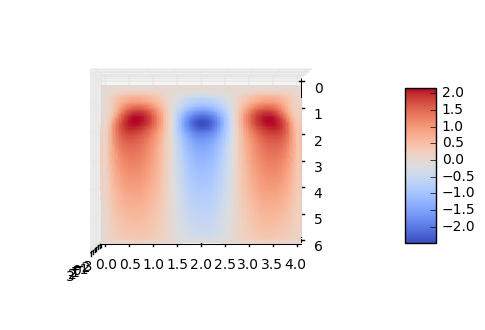

In [105]:
fig = plt.figure()
ax = fig.gca(projection='3d')




#bsq=alldat[6,:,:]*alldat[6,:,:]+alldat[7,:,:]*alldat[7,:,:]
#bmag=sqrt(bsq)

surf = ax.plot_surface(X, Y, vx, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
#ax.set_zlim(-1.01, 1.01)

#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(elev=90,azim=0) 
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

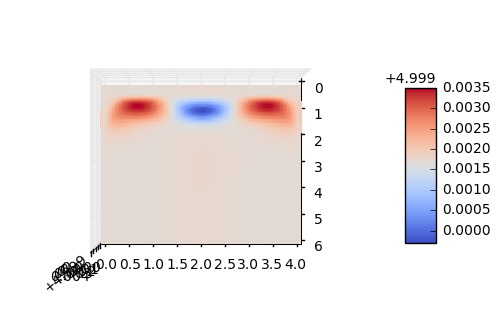

In [106]:
figb = plt.figure()
axb = figb.gca(projection='3d')




#bsq=alldat[6,:,:]*alldat[6,:,:]+alldat[7,:,:]*alldat[7,:,:]
#bmag=sqrt(bsq)

surfb = axb.plot_surface(X, Y, bx, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
#ax.set_zlim(-1.01, 1.01)

#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
axb.view_init(elev=90,azim=0) 
figb.colorbar(surfb, shrink=0.5, aspect=5)

plt.show()